In [1]:
#import libraries
import pandas as pd
import datetime as time
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
from dateutil.relativedelta import relativedelta, TH

In [2]:
data=pd.read_csv(r'F:\DATA\index\NIFTY50\NIFTY50.csv')

data.head()

,symbol,datetime,open,high,low,close,volume
0,NIFTY50,17-07-2017 09:15,9908.15,9908.50,9900.50,9900.50,0
1,NIFTY50,17-07-2017 09:16,9901.90,9905.85,9899.50,9904.35,0
2,NIFTY50,17-07-2017 09:17,9904.45,9906.80,9903.30,9903.30,0
3,NIFTY50,17-07-2017 09:18,9903.35,9908.90,9903.35,9907.80,0
4,NIFTY50,17-07-2017 09:19,9907.00,9911.60,9905.35,9910.15,0


In [3]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M')
data['datetime'] = data['datetime'].apply(lambda x: x - time.timedelta(minutes=15))
data.set_index('datetime',inplace=True)
data['open'] = data['open'].resample('1H').first()
data['high'] = data['high'].resample('1H').max()
data['low'] = data['low'].resample('1H').min()
data['close'] = data['close'].resample('1H').last()
data.dropna(inplace=True)
data.reset_index(inplace=True)
data['datetime'] = data['datetime'].apply(lambda x: x + time.timedelta(minutes=15))
data[0:20]

,datetime,symbol,open,high,low,close,volume
0,2017-07-17 09:15:00,NIFTY50,9908.15,9916.70,9894.85,9915.30,0
1,2017-07-17 10:15:00,NIFTY50,9915.45,9920.30,9911.80,9915.25,0
2,2017-07-17 11:15:00,NIFTY50,9915.40,9916.55,9902.75,9904.70,0
3,2017-07-17 12:15:00,NIFTY50,9904.75,9911.10,9902.60,9907.05,0
4,2017-07-17 13:15:00,NIFTY50,9907.25,9917.30,9904.30,9917.30,0
5,2017-07-17 14:15:00,NIFTY50,9917.40,9928.20,9916.00,9919.90,0
6,2017-07-17 15:15:00,NIFTY50,9919.05,9921.30,9910.40,9913.65,0
7,2017-07-18 09:15:00,NIFTY50,9863.50,9884.45,9853.25,9873.35,0
8,2017-07-18 10:15:00,NIFTY50,9872.75,9875.70,9842.45,9853.10,0
9,2017-07-18 11:15:00,NIFTY50,9853.35,9862.85,9850.90,9856.25,0


In [4]:
data['sma50'] = data['close'].rolling(window=50).mean()
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
data[0:20]

,datetime,symbol,open,high,low,close,volume,sma50
0,2017-07-26 09:15:00,NIFTY50,9977.40,9989.60,9969.50,9982.45,0,9908.985
1,2017-07-26 10:15:00,NIFTY50,9982.30,9995.90,9981.25,9990.15,0,9910.482
2,2017-07-26 11:15:00,NIFTY50,9989.10,10001.55,9988.15,10001.30,0,9912.203
3,2017-07-26 12:15:00,NIFTY50,10004.30,10010.15,9992.60,9995.80,0,9914.025
4,2017-07-26 13:15:00,NIFTY50,9995.75,10004.80,9987.70,9998.70,0,9915.858
5,2017-07-26 14:15:00,NIFTY50,9998.10,10024.20,9997.80,10021.35,0,9917.939
6,2017-07-26 15:15:00,NIFTY50,10023.60,10024.45,10020.30,10020.30,0,9919.947
7,2017-07-27 09:15:00,NIFTY50,10061.20,10096.85,10061.20,10087.25,0,9923.419
8,2017-07-27 10:15:00,NIFTY50,10088.55,10106.50,10084.50,10105.50,0,9928.062
9,2017-07-27 11:15:00,NIFTY50,10109.55,10113.80,10096.50,10104.10,0,9933.082


In [5]:
trade_log=pd.DataFrame(columns=['trade_type','entry_time','entry_price','exit_time'])
trade_log

,trade_type,entry_time,entry_price,exit_time


In [6]:
long_trade_triggered=0
for index,row in data[1:].iterrows():
    previous_row=data.iloc[index-1]
    if(previous_row['close']<previous_row['sma50']) & (row['close']>row['sma50']) & ( long_trade_triggered==0):
        long_trade_triggered=1
        trade_log = trade_log._append({'trade_type':'BUY',
                                      'entry_time':row['datetime'],
                                      'entry_price':row['close']},ignore_index=True)
        
    elif(long_trade_triggered==1)& (previous_row['close']>previous_row['sma50']) & (row['close']<row['sma50']):
        long_trade_triggered=0
        trade_log=trade_log._append({'exit_time':row['datetime'],
                                      'exit_price':row['close']},ignore_index=True)
trade_log     



C:\Users\A\AppData\Local\Temp\ipykernel_17476\3798987827.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trade_log = trade_log._append({'trade_type':'BUY',
C:\Users\A\AppData\Local\Temp\ipykernel_17476\3798987827.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trade_log=trade_log._append({'exit_time':row['datetime'],


,trade_type,entry_time,entry_price,exit_time,exit_price
0,BUY,2017-08-03 11:15:00,10042.85,NaT,NaN
1,NaN,NaT,NaN,2017-08-03 13:15:00,10040.40
2,BUY,2017-08-04 14:15:00,10070.45,NaT,NaN
3,NaN,NaT,NaN,2017-08-07 15:15:00,10049.60
4,BUY,2017-08-16 14:15:00,9895.55,NaT,NaN
...,...,...,...,...,...
509,NaN,NaT,NaN,2022-12-13 13:15:00,18575.95
510,BUY,2022-12-13 14:15:00,18605.85,NaT,NaN
511,NaN,NaT,NaN,2022-12-15 09:15:00,18565.10
512,BUY,2022-12-15 10:15:00,18578.80,NaT,NaN


In [7]:
trade_log['exit_time']=trade_log['exit_time'].shift(-1)
trade_log['exit_price'] = trade_log['exit_price'].shift(-1)
trade_log.dropna(inplace=True)
trade_log

,trade_type,entry_time,entry_price,exit_time,exit_price
0,BUY,2017-08-03 11:15:00,10042.85,2017-08-03 13:15:00,10040.40
2,BUY,2017-08-04 14:15:00,10070.45,2017-08-07 15:15:00,10049.60
4,BUY,2017-08-16 14:15:00,9895.55,2017-08-18 09:15:00,9843.95
6,BUY,2017-08-21 09:15:00,9870.90,2017-08-21 11:15:00,9829.85
8,BUY,2017-08-23 14:15:00,9854.60,2017-08-29 09:15:00,9840.40
...,...,...,...,...,...
504,BUY,2022-11-24 09:15:00,18351.85,2022-12-05 09:15:00,18596.80
506,BUY,2022-12-05 10:15:00,18638.40,2022-12-06 09:15:00,18635.75
508,BUY,2022-12-13 12:15:00,18599.70,2022-12-13 13:15:00,18575.95
510,BUY,2022-12-13 14:15:00,18605.85,2022-12-15 09:15:00,18565.10


<Axes: >

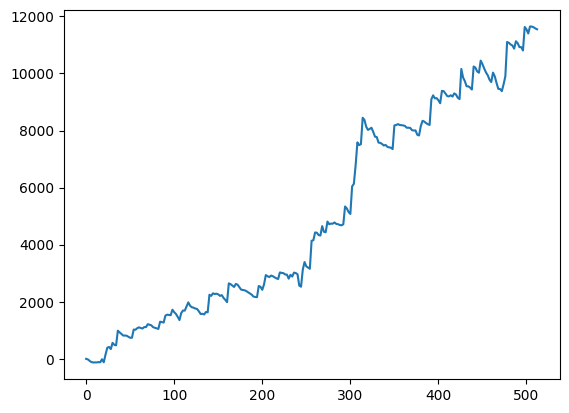

In [8]:
trade_log['pnl']=trade_log['exit_price']-trade_log['entry_price']
trade_log['pnl'].cumsum().plot()

<Axes: >

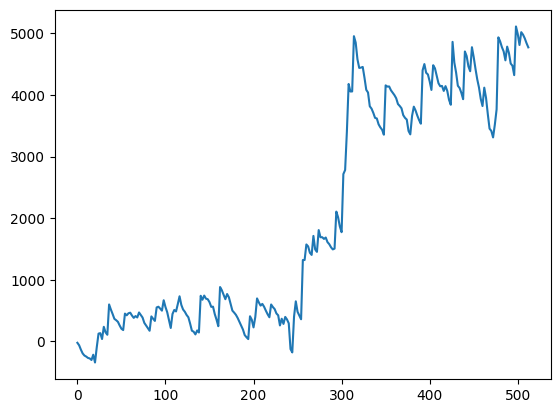

In [9]:
trade_log['Entry_Including_Slippage'] = trade_log['entry_price'] +(trade_log['entry_price']*0.001) 
trade_log['Exit_Including_Slippage'] = trade_log['exit_price'] - (trade_log['exit_price']*0.001) 
trade_log['PnL_Including_Slippages'] = trade_log['Exit_Including_Slippage']-trade_log['Entry_Including_Slippage']
trade_log['PnL_Including_Slippages'].cumsum().plot()